In [1]:
print ('Om Mahaa Ganapataye Namah')

Om Mahaa Ganapataye Namah


## Business Case - Retail warranty return prediction
** The retail file holds the sales , discount , shipment_cost and other vital data. Explore the data to come up with insights. Treat this case study as an open ended and  try to come up with a few insights. Imagine you are responsible for making sure that your marketing stakeholders should be able to come up with the relevant strategies to attract  more customers by unique offers with your insights. Also,  you need to perform from the delivery aspect which can drive the logistics to determine how best they can reduce the  shipment duration and optimize their shipping cost.**

### Step 1 Understanding the business objective and variables

### Step 2

   1. Import libraries  
 
   2. Load all the data files 

   3. Run Statistical summaries 

### Step 3 -  Data Visualization

   1. Univariate Analysis - Checking distribution of continuous variable for outlier detection and missing values 

   2. BiVariate Analysis 
   
   3. Correlation with outcome variable  

##  Data Preprocessing 

### Step 4 - Detecting and  Handling missing Values

   1. Identifying Training and test data missing columns
   2. Percent missing value for each variable
   2. Replacing Missing Values as 'Missing Values' and blank records with NaN 

### Step 5 - Detecting and  Handling Outliers

   1. Checking distribution of continuous variable for outlier detection  
   2. Determine cutoff for capping
   3. Capping the values 

### Step 6 - Feature Extraction and scaling
   1. create new features such as month, day, weekday and year 
   2. No. of days to ship - Ship Date - Order Date
   
### Step 7 - Feature Selection 

### Step 8 - Feature Engineering
   
   1. Dealing with Categorical features 
   2. Converting dates to data objects   
   4. Removing special characters from continuous variable and converting it to numeric feature
   
### Step 9 - Modeling
   1. Model Selection 
   2. Cross Validation
   
### Step 10. Evaluating Model Performance 
   3. Performance metrics
   4. Hyperparameter Optimization

## Import the necessary pacakges

In [61]:
# Import the necessary packages 
import numpy as np

# data processing
import pandas as pd

# Operating system commands
import os

# data visualization
import matplotlib.pyplot as plt   # visualization
from  matplotlib import style
import seaborn as sns   # visualization
%matplotlib inline

# Algorithms
#from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import GaussianNB

## Load the data sets 

In [40]:
# Display current working directory
print os.getcwd()
os.chdir("D:/dat5")

print os.getcwd()
df = pd.read_csv("./sales_w05.csv",sep=",")
df1 = pd.read_csv("./sales_w06.csv",sep=",")
print df.shape
print df1.shape

# Combine both df and df1 data frames
# axis = 0 is df = pd.read_csv("D:/dat5/sales_w05.csv",sep=",")
df1 = pd.read_csv("D:/dat5/sales_w06.csv",sep=",")#row wise concatenation
df2 = pd.concat((df,df1),axis=0)
df2 = df2.dropna(how='any',axis=0)
df2.head()

D:\dat5
D:\dat5
(25000, 27)
(25000, 27)


,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
8,9,40155,CA-2014-135909,10/14/2014,10/21/2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,...,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5,0.2,1906.4850,867.69,Low,No,0
9,10,40936,CA-2012-116638,1/28/2012,1/31/2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,...,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical,No,0
10,11,34577,CA-2011-102988,4/5/2011,4/9/2011,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,...,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4164.05,5,0.0,83.2810,846.54,High,No,0
16,17,36178,CA-2014-143567,11/3/2014,11/6/2014,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,...,Accessories,Logitech diNovo Edge Keyboard,2249.91,9,0.0,517.4793,780.70,Critical,No,0


# Data Exploration

In [44]:
print df2.size
print df2.isnull().sum()
#print df2.head(3)
#print df2.info()

217890
Unnamed: 0        0
Row.ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer.Name     0
Segment           0
City              0
State             0
Country           0
Postal.Code       0
Market            0
Region            0
Product.ID        0
Category          0
Sub.Category      0
Product.Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order_Priority    0
Return            0
Returned          0
dtype: int64


In [5]:
#df2.columns
#df2.info()
df2['Category'].unique()
print '\n'
print df2['Category'].value_counts()
print '\n'
df2['Sub.Category'].unique()
print '\n'
print df2['Sub.Category'].value_counts()
print '\n'
df2['State'].unique()
print '\n'
df2['Country'].unique()



Office Supplies    19764
Technology         15890
Furniture          14346
Name: Category, dtype: int64




Storage        5670
Chairs         5530
Phones         5438
Bookcases      4478
Copiers        4150
Accessories    3862
Art            3028
Furnishings    2718
Appliances     2614
Binders        2518
Machines       2440
Paper          1960
Supplies       1756
Tables         1620
Envelopes      1364
Fasteners       488
Labels          366
Name: Sub.Category, dtype: int64






array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France', 'Italy',
       'Tanzania', 'Poland', 'United Kingdom', 'Mexico', 'El Salvador',
       'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Canada', 'Philippines', 'Austria', 'Colombia',
       'Netherlands', 'Malaysia', 'Ecuador', 'Thailand', 'Somalia',
       'Guatemala', 'Belarus', 'Cambodia', 'South Africa', 'Japan',
       'Russia', 'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina',
       'Lesotho', 'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon',
       'Hungary', 'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland',
       'Ghana', 'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland',
       'Albania', 'Chad', 'Montenegro', 'Namibia', 'Portugal',
       'Madagascar', 'Sweden', 'Myanmar 

** Perform Sanity Check &  Preprocess the data  **
    - Explore the missing values
    - Exclude columns that are not required for this analysis
    - Remove special characater if any from numeric varaibles
    - Check for outliers
    - Converting features
    - Creating New Features
    

In [60]:
df2.isnull().sum()


Unnamed: 0        0
Row.ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer.Name     0
Segment           0
City              0
State             0
Country           0
Postal.Code       0
Market            0
Region            0
Product.ID        0
Category          0
Sub.Category      0
Product.Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order_Priority    0
Return            0
Returned          0
dtype: int64

In [59]:
df2[df2['Sales'].str.contains("$|,",na=False)]
#df2.str.contains("$|,",na=False)
#df2.filter(regex='$,', axis=1)
#df2.Sales.head(10)

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
8,9,40155,CA-2014-135909,10/14/2014,10/21/2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,...,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5,0.2,1906.4850,867.69,Low,No,0
9,10,40936,CA-2012-116638,1/28/2012,1/31/2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,...,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical,No,0
10,11,34577,CA-2011-102988,4/5/2011,4/9/2011,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,...,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4164.05,5,0.0,83.2810,846.54,High,No,0
16,17,36178,CA-2014-143567,11/3/2014,11/6/2014,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,...,Accessories,Logitech diNovo Edge Keyboard,2249.91,9,0.0,517.4793,780.70,Critical,No,0
34,35,32543,CA-2011-168494,12/12/2011,12/14/2011,Second Class,NP-18700,Nora Preis,Consumer,Fresno,...,Tables,Bretford Rectangular Conference Table Tops,3610.848,12,0.2,135.4068,683.12,High,No,0
36,37,36423,CA-2011-160766,9/14/2011,9/14/2011,Same Day,DM-13015,Darrin Martin,Consumer,New York City,...,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.96,4,0.0,1371.9804,675.15,High,Yes,1
37,38,31980,US-2014-168116,11/5/2014,11/5/2014,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,...,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.98,4,0.5,-3839.9904,674.82,High,No,0
45,46,35395,CA-2011-116904,9/23/2011,9/28/2011,Standard Class,SC-20095,Sanjit Chand,Consumer,Minneapolis,...,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.0,4630.4755,655.61,Medium,No,0
50,51,40046,US-2012-163825,6/16/2012,6/19/2012,First Class,LC-16885,Lena Creighton,Consumer,New York City,...,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3050.376,3,0.2,1143.8910,632.05,High,No,0


In [25]:
df2.head()

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
1,2,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,1
2,3,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0


In [6]:
# Drop columns those are irrelevant
# drops = df2['Postal.Code','Phone_no']
df2['Sales'] = pd.to_numeric(df['Sales'].str.replace(r'[$,]', ''))
df2.head()
# now $ and , got removed 

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,No,0
1,2,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,1
2,3,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,No,0


In [27]:
df2.dtypes

Unnamed: 0          int64
Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Postal.Code       float64
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [7]:
#df_agg = df.groupby(["State","Category"]).agg({'Sales':"sum"})
#df_agg
# select sum(Sales) from df2 group by (country,cateogyr)
df_agg = df2.groupby(['Country','Category']).agg({'Sales':"sum"})
print df_agg 

df_agg1 = df2.groupby(['Country','Category'])['Sales','Quantity'].sum()
print df_agg1

                                             Sales
Country              Category                     
Afghanistan          Furniture        2.216082e+04
                     Office Supplies  5.636400e+03
                     Technology       1.264134e+04
Albania              Furniture        1.555560e+03
                     Office Supplies  7.849200e+02
                     Technology       4.710180e+03
Algeria              Furniture        1.582188e+04
                     Office Supplies  2.069622e+04
                     Technology       2.614416e+04
Angola               Furniture        1.663146e+04
                     Office Supplies  1.200954e+04
                     Technology       1.657032e+04
Argentina            Furniture        4.335920e+04
                     Office Supplies  1.667426e+04
                     Technology       3.662375e+04
Australia            Furniture        6.585629e+05
                     Office Supplies  3.977035e+05
                     Technology

In [8]:
#df_agg = df.groupby(["State","Category"]).agg({'Sales':"sum"})
#df_agg
df_agg = pd.pivot_table(df2,index=['Country','Category'],values=['Quantity','Sales'], aggfunc=[np.sum],dropna=False)
df_agg.head(3)

sum          
                            Quantity     Sales
Country     Category                          
Afghanistan Furniture             80  22160.82
            Office Supplies      148   5636.40
            Technology            94  12641.34

In [17]:
# produce a report month wise, day wise 
print df2.dtypes
print df2.shape
df2.head()

Unnamed: 0                 int64
Row.ID                     int64
Order_ID                  object
Order_Date        datetime64[ns]
Ship_Date                 object
Ship_Mode                 object
Customer_ID               object
Customer.Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal.Code              float64
Market                    object
Region                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping_Cost            float64
Order_Priority            object
Return                    object
Returned                   int64
year                       int64
month                      int64
day                        int64
dofweek   

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Profit,Shipping_Cost,Order_Priority,Return,Returned,year,month,day,dofweek,days
0,1,32298,CA-2012-124891,2012-07-31,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,762.1845,933.57,Critical,No,0,2012,7,31,1,Tuesday
1,2,26341,IN-2013-77878,2013-02-05,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,-288.7650,923.63,Critical,Yes,1,2013,2,5,1,Tuesday
2,3,25330,IN-2013-71249,2013-10-17,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,919.9710,915.49,Medium,No,0,2013,10,17,3,Thursday
3,4,13524,ES-2013-1579342,2013-01-28,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,-96.5400,910.16,Medium,No,0,2013,1,28,0,Monday
4,5,47221,SG-2013-4320,2013-11-05,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,311.5200,903.04,Critical,No,0,2013,11,5,1,Tuesday


In [13]:
import datetime as dt
df2['Order_Date'] = pd.to_datetime(df.Order_Date)
df2['Ship_Date'] =  pd.to_datetime(df.Ship_Date)
df2['days2Ship'] =  df2['Ship_Date'] - df2['Order_Date']
df2.dtypes
df2['year'] = df2['Order_Date'].dt.year
df2['month'] = df2['Order_Date'].dt.month
df2['day'] = df2['Order_Date'].dt.day
df2['dofweek'] = df2['Order_Date'].dt.dayofweek
df2['days'] = df2[['Order_Date']].apply(lambda x: dt.datetime.strftime(x['Order_Date'], '%A'), axis=1)
df2.head

<bound method DataFrame.head of        Unnamed: 0  Row.ID         Order_ID Order_Date  Ship_Date  \
0               1   32298   CA-2012-124891 2012-07-31 2012-07-31   
1               2   26341    IN-2013-77878 2013-02-05 2013-02-07   
2               3   25330    IN-2013-71249 2013-10-17 2013-10-18   
3               4   13524  ES-2013-1579342 2013-01-28 2013-01-30   
4               5   47221     SG-2013-4320 2013-11-05 2013-11-06   
5               6   22732    IN-2013-42360 2013-06-28 2013-07-01   
6               7   30570    IN-2011-81826 2011-11-07 2011-11-09   
7               8   31192    IN-2012-86369 2012-04-14 2012-04-18   
8               9   40155   CA-2014-135909 2014-10-14 2014-10-21   
9              10   40936   CA-2012-116638 2012-01-28 2012-01-31   
10             11   34577   CA-2011-102988 2011-04-05 2011-04-09   
11             12   28879    ID-2012-28402 2012-04-19 2012-04-22   
12             13   45794     SA-2011-1830 2011-12-27 2011-12-29   
13             1

In [11]:
df_pv2 = pd.pivot_table(df2,index=['Category','dofweek'],values=['Sales'], aggfunc=[np.sum],dropna=False)
df_pv2.head(3)

sum
                          Sales
Category  dofweek              
Furniture 0        1.357772e+06
          1        1.313783e+06
          2        1.278885e+06

<function matplotlib.pyplot.show>

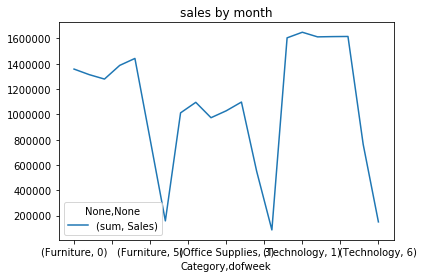

In [21]:
fig=plt.figure(figsize=(45,40))
ax1=df_pv2.plot(kind='line')
plt.title('sales by month')
plt.show
#fig.savefig("D:/dat5/fig1.png",dpi=300)

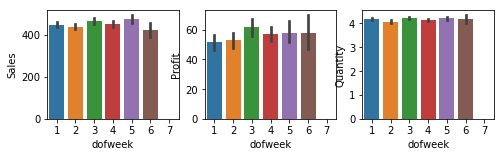

In [34]:
# figsize (width,height)
fig, (axis1,axis2,axis3) = plt.subplots(nrows=1,ncols=3,figsize=(8,2))

sns.barplot(x='dofweek',y='Sales',data=df2, order=[1,2,3,4,5,6,7],ax=axis1)
sns.barplot(x='dofweek',y='Profit',data=df2, order=[1,2,3,4,5,6,7],ax=axis2)
sns.barplot(x='dofweek',y='Quantity',data=df2, order=[1,2,3,4,5,6,7],ax=axis3)

In [35]:
df2.columns

Index([u'Unnamed: 0', u'Row.ID', u'Order_ID', u'Order_Date', u'Ship_Date',
       u'Ship_Mode', u'Customer_ID', u'Customer.Name', u'Segment', u'City',
       u'State', u'Country', u'Postal.Code', u'Market', u'Region',
       u'Product.ID', u'Category', u'Sub.Category', u'Product.Name', u'Sales',
       u'Quantity', u'Discount', u'Profit', u'Shipping_Cost',
       u'Order_Priority', u'Return', u'Returned', u'year', u'month', u'day',
       u'dofweek', u'days'],
      dtype='object')

In [37]:
df2['Sales2'] = df2.Sales /100000
seg_cat_sales = pd.pivot_table(df2,values='Sales2',index='Segment', columns=['Category'],aggfunc='sum')
seg_cat_sales1 = pd.pivot_table(df2,values='Sales2',index='Segment', columns=['Category'],aggfunc='count')
seg_cat_sales.head()
seg_cat_sales1.head()

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,7342,10318,8278
Corporate,4434,5822,4714
Home Office,2524,3594,2854


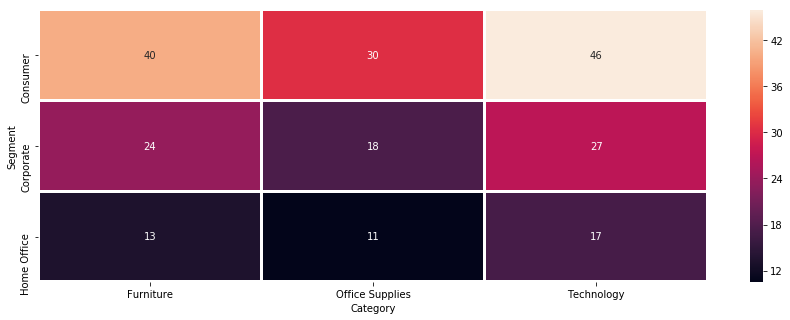

In [39]:
plt.subplots(1,1,figsize=(15,5))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)

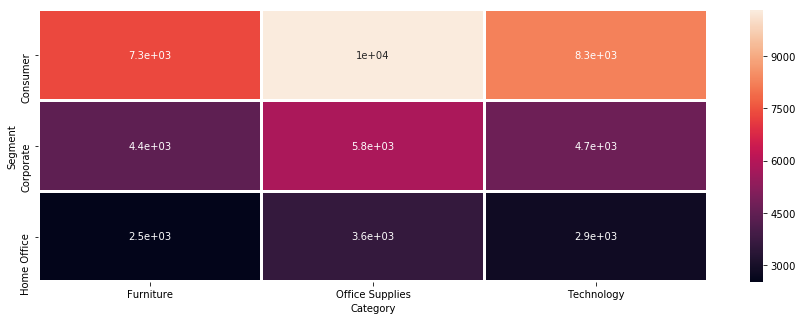

In [127]:
fig, (axis1)= plt.subplots(1,1,figsize=(15,5))
sns.heatmap(seg_cat_sales1,annot=True,linewidth=2)

In [9]:
df2['Sales2'] = df2.Sales /100000
seg_cat_sales = pd.pivot_table(df2,values='Sales2',index='Ship_Mode', columns=['Category'],aggfunc='sum')

seg_cat_sales.head()

Category,Furniture,Office Supplies,Technology
Ship_Mode,,,
First Class,11.156712,9.589411,12.853038
Same Day,3.739631,3.237041,5.171952
Second Class,15.564543,12.755993,18.192720
Standard Class,46.945409,32.859239,53.873378


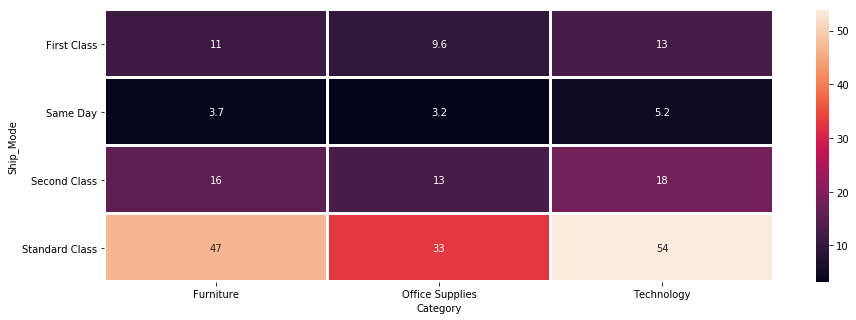

In [10]:
fig, (axis1)= plt.subplots(1,1,figsize=(15,5))
ns.heatmap(seg_cat_sales,annot=True,linewidth=2)

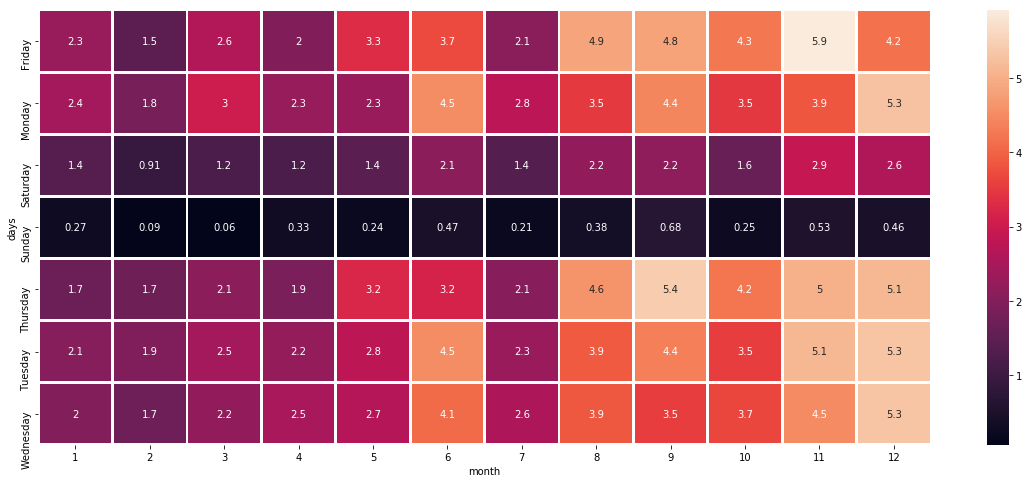

In [13]:
df2['Sales2'] = df2.Sales /100000
seg_cat_sales = pd.pivot_table(df2,values='Sales2',index='days', columns=['month'],aggfunc='sum')
fig, (axis1)= plt.subplots(1,1,figsize=(20,8))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)


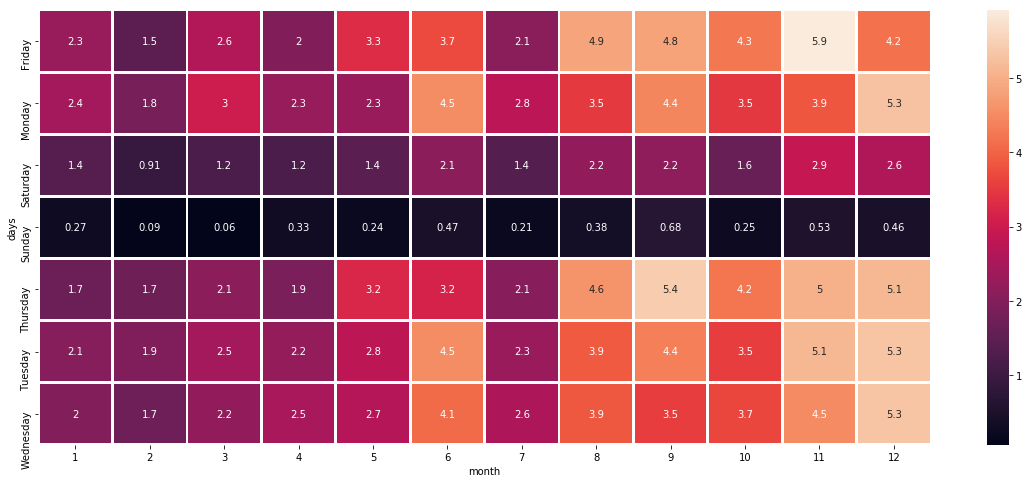

In [14]:
# returns 
df2['Sales2'] = df2.Sales /100000
seg_cat_sales = pd.pivot_table(df2,values='Sales2',index='days', columns=['month'],aggfunc='sum')
fig, (axis1)= plt.subplots(1,1,figsize=(20,8))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)


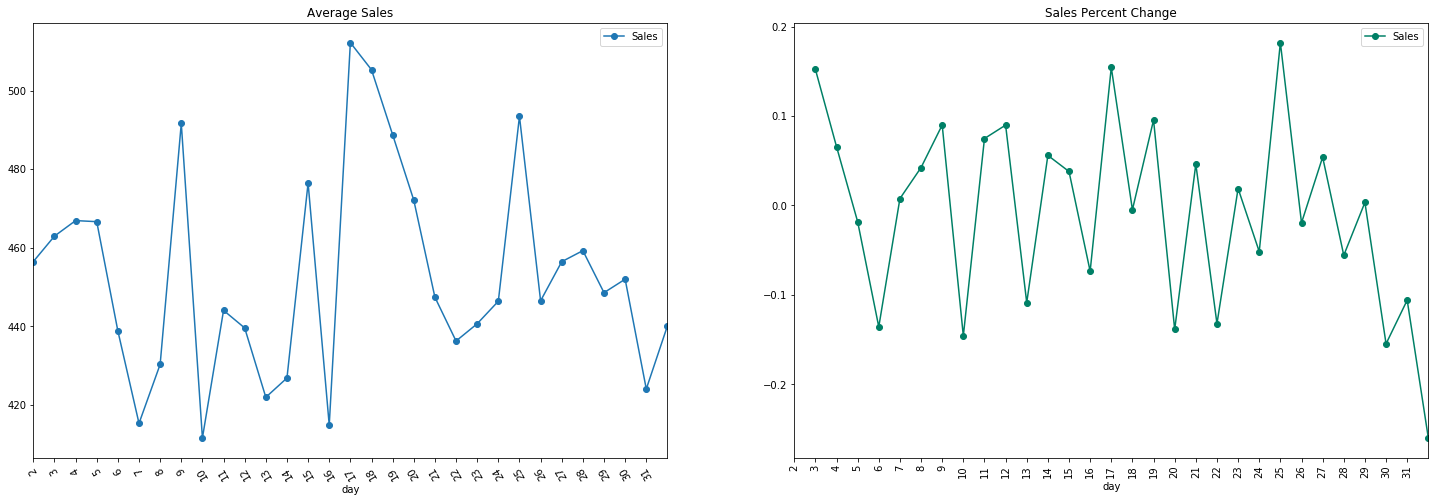

In [15]:
# group by date and get average sales, and precent change
average_sales   = df2.groupby('day')["Sales"].mean()
pct_change_sales = df2.groupby('day')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(25,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=120)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

KeyError: 'Consumer'

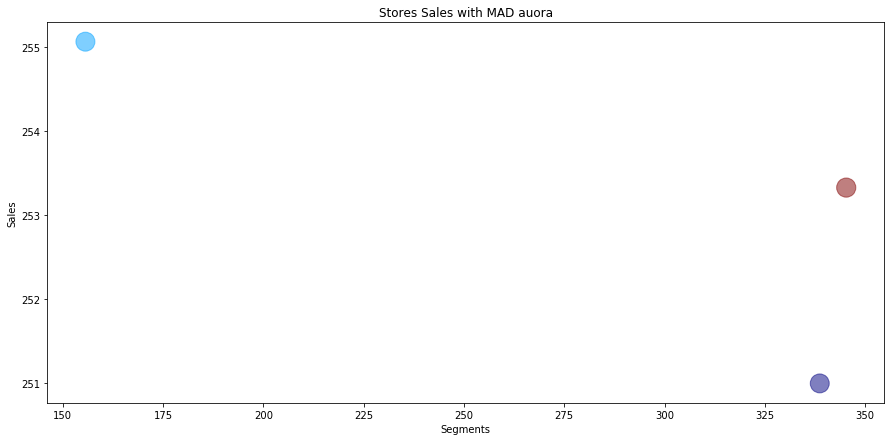

In [16]:
sales_perstore = df2.groupby('Segment')['Sales'].median()
mad_sales_perstore = df2.groupby('Segment')['Sales'].mad()

cust_perstore = df2.groupby('Category')['Sales'].median()
mad_cust_perstore = df2.groupby('Category')['Sales'].mad()
# sales to customer ratio
sales_cust_ratio = sales_perstore/cust_perstore
#mad_sales_cust_ratio = mad_sales_perstore/cust_perstore  # MAD for sales_cust_ratio is ratio between MAD sales and total customers
# plot scatter plot of sales vs customers
fig, (axis1) = plt.subplots(1,1, sharex=True,figsize=(15,7))
colors = np.random.rand(len(sales_perstore))
axis1.scatter(cust_perstore, sales_perstore, s=mad_sales_perstore, c=colors, cmap='jet', alpha=0.5)
axis1.set_xlabel('Segments')
axis1.set_ylabel('Sales')
axis1.set_title('Stores Sales with MAD auora')
for store in sales_perstore.index:
    #print('{}'.format(sales_perstore[i]))
    axis1.annotate(store, (cust_perstore[store], sales_perstore[store]))
# plot a fitted line
linefit = np.poly1d(np.polyfit(cust_perstore, sales_perstore, 1))(cust_perstore);
axis1.plot(cust_perstore, linefit)

ValueError: x and y must be the same size

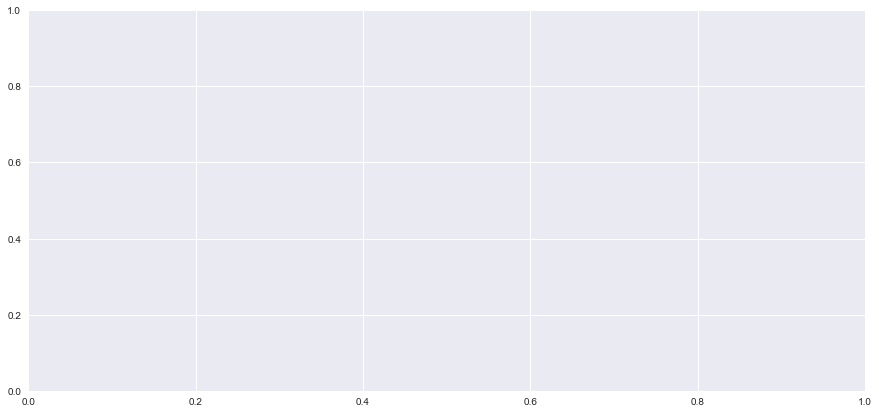

In [17]:
SC_perstore = df2.groupby('Segment')['Profit'].median()
mad_SC_perstore = df2.groupby('Segment')['Profit'].mad()
cust_perstore = df2.groupby('State')['Profit'].median()
mad_cust_perstore = df2.groupby('State')['Profit'].mad()
# scatter plot of sales/customers vs customers
sns.set(font_scale=1)
fig, (axis1) = plt.subplots(1,1, sharex=True,figsize=(15,7))
colors = np.random.rand(len(SC_perstore))
axis1.scatter(cust_perstore, SC_perstore, s=mad_SC_perstore*1000, c=colors, cmap='jet', alpha=0.5) # multiplying "size" by 1000 to make the extent visible
axis1.set_xlabel('Customers')
axis1.set_ylabel('Sales/Customers')
axis1.set_title('Stores Sales/Customers ratio with MAD auora')
for store in SC_perstore.index:
    #print('{}'.format(sales_perstore[i]))
    axis1.annotate(store, (cust_perstore[store], SC_perstore[store]))

In [16]:
g = sns.FacetGrid(df2, col="Ship_Mode",  row="Sales")
g
# g = g.map(plt.hist, "total_bill")

KeyboardInterrupt: 

ValueError: Image size of 864x3360960 pixels is too large. It must be less than 2^16 in each direction.

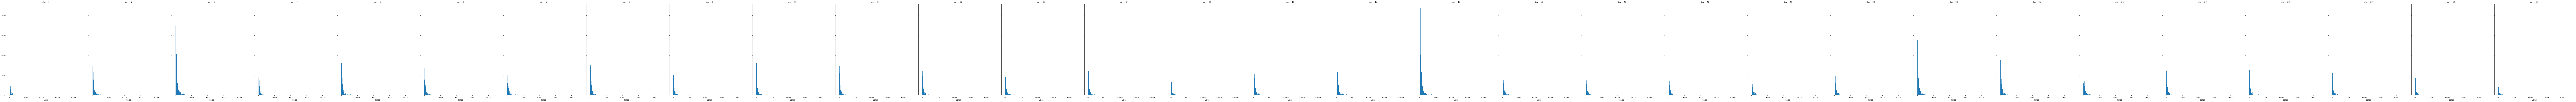

In [17]:
g1 = sns.FacetGrid(df2, col="day", size=8, aspect=.8)
g1 = g1.map(plt.hist, "Sales", bins=100)
g1

In [ ]:
g = sns.FacetGrid(df2, col="Returned", row="sex",
                   margin_titles=True)
 g = (g.map(plt.scatter, "total_bill", "tip", color="m", **kws)
       .set(xlim=(0, 60), ylim=(0, 12),
            xticks=[10, 30, 50], yticks=[2, 6, 10])
       .fig.subplots_adjust(wspace=.05, hspace=.05))

In [ ]:
df2.columns

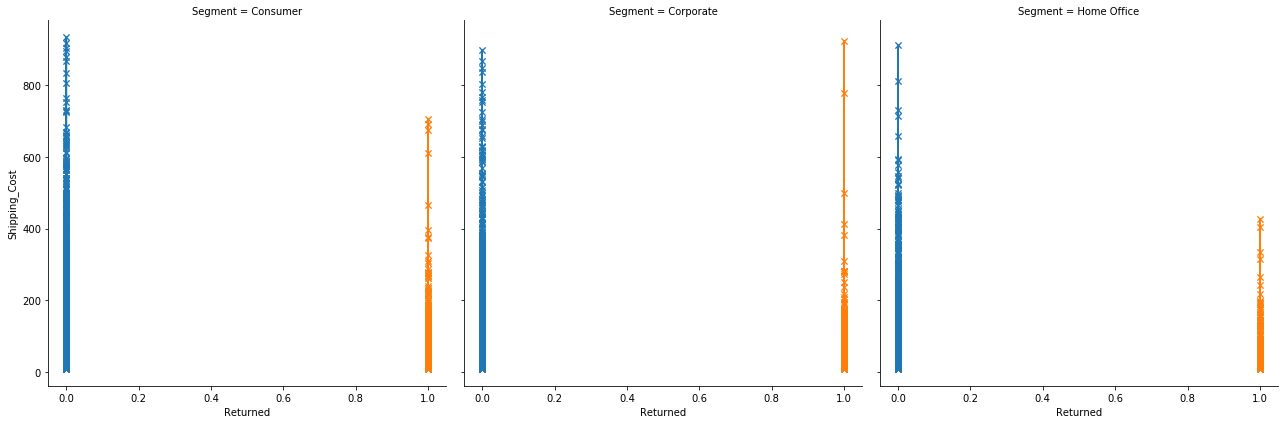

In [45]:

#g2 = sns.FacetGrid(df2,col='Category', hue='Returned',size=6)
#g2.map(plt.plot,"Returned","Shipping_Cost", marker= "*")
# g = g.map(plt.hist, "total_bill")
g3 = sns.FacetGrid(df2,col='Segment', hue='Returned',size=6)
g3.map(plt.plot,"Returned","Shipping_Cost", marker= "x")



In [8]:
df2.columns

Index([u'Unnamed: 0', u'Row.ID', u'Order_ID', u'Order_Date', u'Ship_Date',
       u'Ship_Mode', u'Customer_ID', u'Customer.Name', u'Segment', u'City',
       u'State', u'Country', u'Postal.Code', u'Market', u'Region',
       u'Product.ID', u'Category', u'Sub.Category', u'Product.Name', u'Sales',
       u'Quantity', u'Discount', u'Profit', u'Shipping_Cost',
       u'Order_Priority', u'Return', u'Returned', u'year', u'month', u'day',
       u'dofweek'],
      dtype='object')

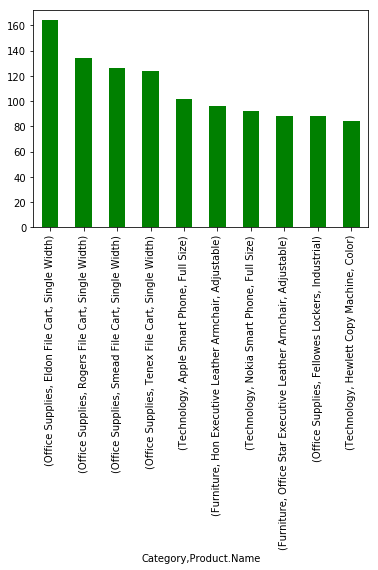

In [136]:
df5 = df2.groupby(['Product.Name'])['Returned'].count()
top5 = df2.groupby(['Category','Product.Name'])['Returned'].count().nlargest(10).plot(kind='bar',color='g')
top5

# top5[0:2]
# g6 = sns.plot(top5,x=top5[0]
#g3 = sns.FacetGrid(df2,col='Segment', hue='Returned',size=6)
#g3.map(plt.plot,"Returned","Shipping_Cost", marker= "*")
# top5[0:2]
# g6 = sns.plot(top5,x=top5[0]
#g3 = sns.FacetGrid(df2,col='Segment', hue='Returned',size=6)
#g3.map(plt.plot,"Returned","Shipping_Cost", marker= "*")

Axes(0.125,0.125;0.775x0.755)


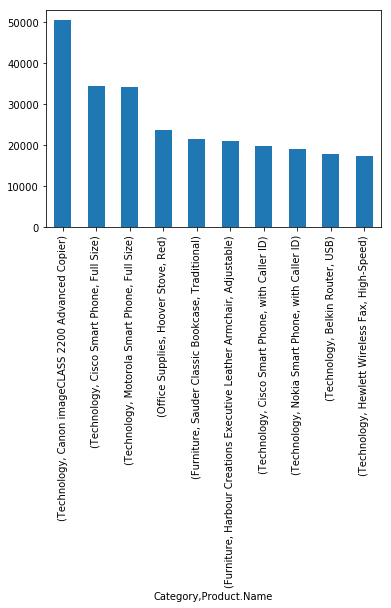

In [121]:
# df5 = df2.groupby(['Product.Name'])['Returned'].count()
top55 = df2.groupby(['Category','Product.Name'])['Profit'].sum().nlargest(10).plot(kind='bar')
print top55


Axes(0.125,0.125;0.775x0.755)


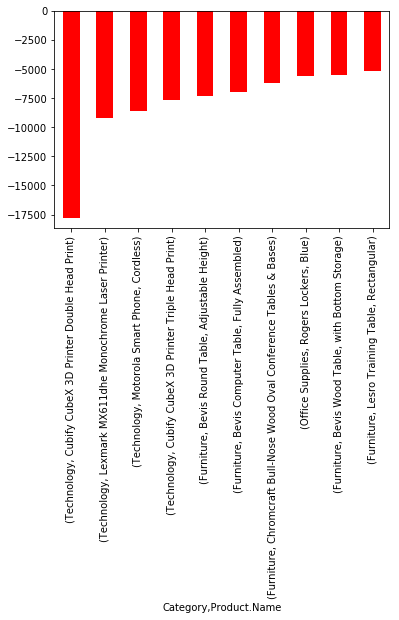

In [137]:
bot55 = df2.groupby(['Category','Product.Name'])['Profit'].sum().nsmallest(10).plot(kind='bar',color='r')
print bot55

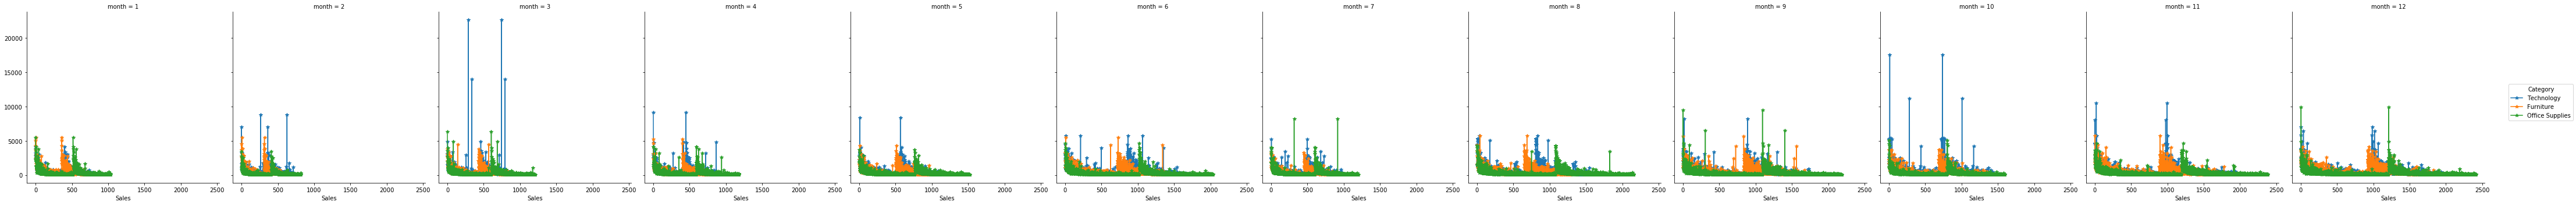

In [132]:
# g = g.map(plt.hist, "total_bill")
g3 = sns.FacetGrid(df2,col='month', hue='Category',size=5)
g3.map(plt.plot,"Sales", marker= "*").add_legend()
plt.savefig("D:/dat5/mSales")

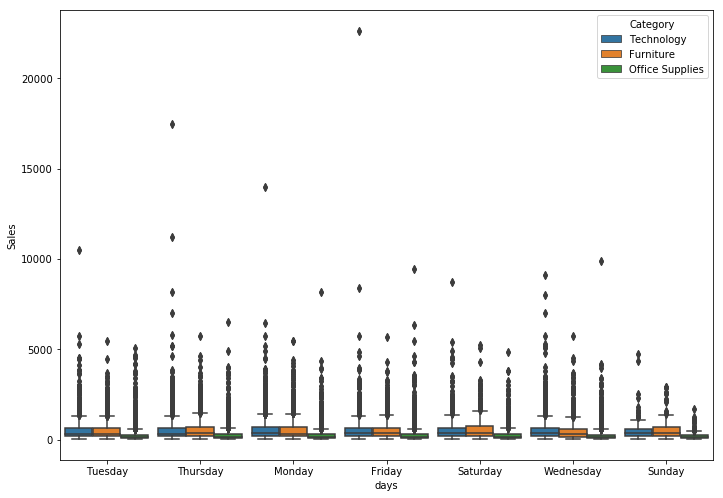

In [179]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
# seaborn.voilinplot(ax=ax, data=df, **violin_options)
sns.boxplot(x="days", y="Sales", hue="Category", data=df2, dodge=True,width=0.9);
#help(sns.boxplot)

In [33]:
# data['weekday'] = data['my_dt'].apply(lambda x: x.weekday())
#then you can filter for weekdays with:
# weekdays_only = data[data['weekday'] < 5 ]
# We apply, row by row (axis=1) a timedelta operation
# df['week_start'] = df.apply(lambda x: x['myday'] - dt.TimeDelta(days=x['mydays']), axis=1)

df2['days'] = df2[['Order_Date']].apply(lambda x: dt.datetime.strftime(x['Order_Date'], '%A'), axis=1)
df2.head(3)
# df['week_start'] = df['myday'].dt.to_period('W').apply(lambda r: r.start_time)
# df['week_start'] = df['Order_Date'].dt.to_period('W').apply(lambda r: r.start_time)

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Profit,Shipping_Cost,Order_Priority,Return,Returned,year,month,day,dofweek,days
0,1,32298,CA-2012-124891,2012-07-31,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,762.1845,933.57,Critical,No,0,2012,7,31,1,Tuesday
1,2,26341,IN-2013-77878,2013-02-05,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,-288.7650,923.63,Critical,Yes,1,2013,2,5,1,Tuesday
2,3,25330,IN-2013-71249,2013-10-17,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,919.9710,915.49,Medium,No,0,2013,10,17,3,Thursday


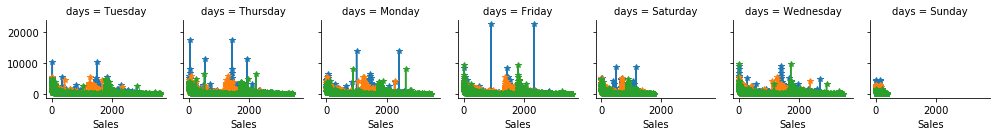

In [30]:
# g = g.map(plt.hist, "total_bill")
g5 = sns.FacetGrid(df2,col='days', hue='Category',size=2)
g5.map(plt.plot,"Sales", marker= "*")
# plt.savefig("D:/dat5/mSales")

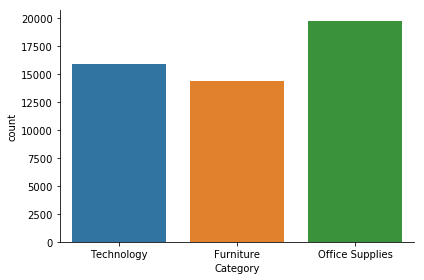

In [79]:
sns.countplot(x='Category',data=df2)
sns.despine()             
plt.tight_layout()

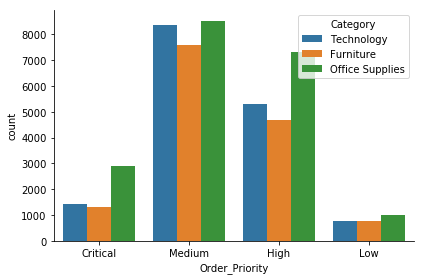

In [81]:
sns.countplot(x='Order_Priority',hue='Category',data=df2)
sns.despine()             
plt.tight_layout()

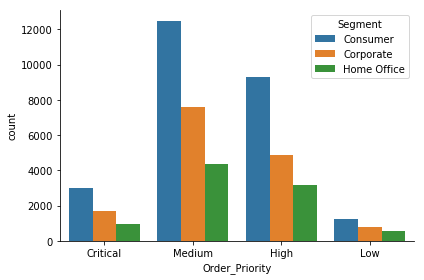

In [87]:
sns.countplot(x='Order_Priority',hue='Segment',data=df2)
sns.despine()             
plt.tight_layout()

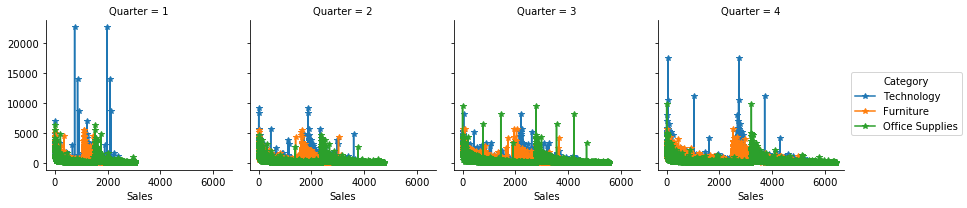

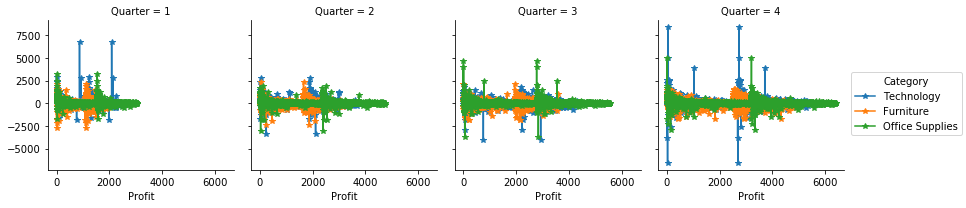

In [129]:
# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='Quarter', hue='Category',size=3)
g8.map(plt.plot,"Sales", marker= "*").add_legend()

# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='Quarter', hue='Category',size=3)
g8.map(plt.plot,"Profit", marker= "*").add_legend()

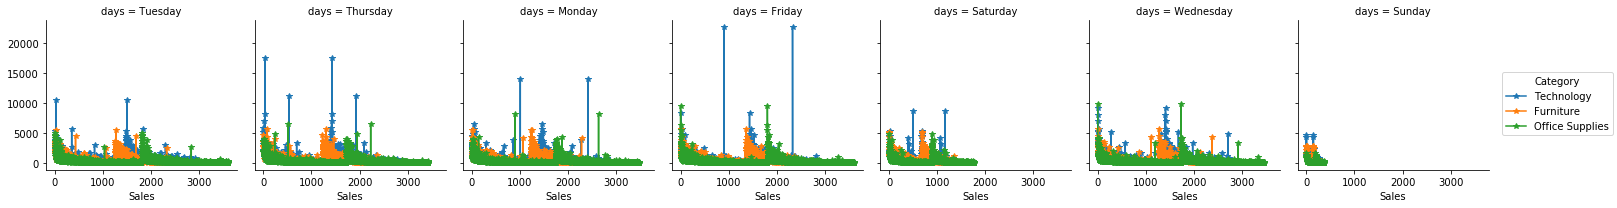

In [157]:
# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='days', hue='Category',size=3)
g8.map(plt.plot,"Sales", marker= "*").add_legend()

plt.savefig("D:/dat5/daySales.png")

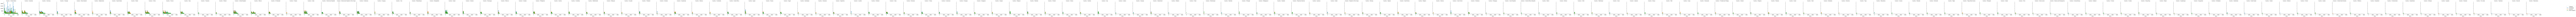

In [158]:
# g = g.map(plt.hist, "total_bill")
g8 = sns.FacetGrid(df2,col='Country', hue='Category',size=3)
g8.map(plt.plot,"Sales", marker= "*").add_legend()

plt.savefig("D:/dat5/ctrySales.png")

In [188]:
cnt = df2.groupby(['Customer.Name','month'])['Sales'].count().nlargest(10)
cnt1 = df2.groupby(['Customer.Name','month'])['Sales'].count()
#sns.
cnt1[1:2]

Customer.Name     month
Heather Jas       8        34
Paul Prost        2        34
Harry Marie       12       32
Barry Gonzalez    9        30
Brad Eason        8        30
Eric Murdock      9        30
Nick Radford      6        30
Stefania Perrino  12       30
William Brown     12       30
Jack Lebron       6        28
Name: Sales, dtype: int64

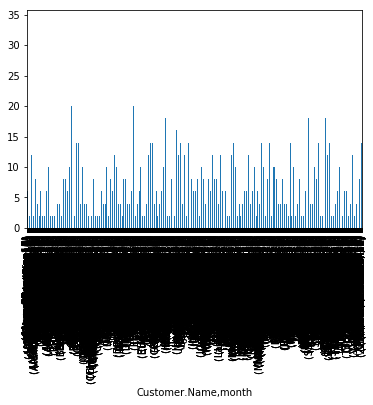

In [193]:
cnt1.plot(kind='bar')

            Category
year month          
2012 1            44
     2            50
     3           110
     4           120
     5           128
     6            96
     7           120
     8           138
     9           222
     10          140
     11          284
     12          272
2013 1            78
     2            78
     3           150
     4           132
     5           166
     6           172
     7           150
     8           144
     9           262
     10          134
     11          306
     12          328
2014 1           122
     2            90
     3           184
     4           152
     5           192
     6           188
     7           204
     8           190
     9           376
     10          224
     11          374
     12          360


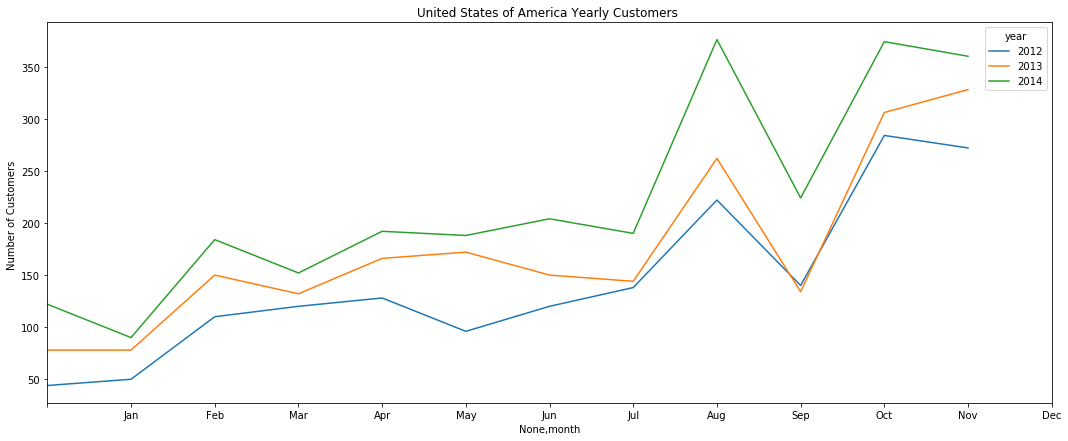

In [122]:
# df3 = df2.loc[df2['City'] == 'New York City',('year','month','Category')]
#warranty.loc[(warranty.City == 'Istanbul') & (warranty.Sales > 31)]

df3 = df2.loc[(df2.Country== 'United States') & (df2.year != 2011),('year','month','Category')]

cnt = df3.groupby(['year','month']).count()
#cnt1 = df2.groupby(['Customer.Name','month'])['Sales'].count()
#sns.
print cnt
import calendar
fig, (axis1) = plt.subplots(1,1, figsize=(18,7))
cnt.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("United States of America Yearly Customers ")
tmp = axis1.set_ylabel("Number of Customers ")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

In [172]:
'''
df3 = df2.loc[(df2.year != 2011),('year','month','Country','Category')]
cnt = df3.groupby(['Country','year','month']).count()
cnt = cnt.unstack().T
cnt = pd.DataFrame(cnt)
cnt=cnt.fillsana(0)
'''
df3 = df2.loc[(df2.year != 2011),('year','month','Country','Category','Sales')]
cnt1 = df3.groupby(['Country','year','month'])['Sales'].count()
cnt1 = cnt1.unstack().T.fillna(0)
#print cnt1
# cnt1.to_csv("D:/dat5/cnt1.csv")
cnt1.info()
#mell = pd.melt(cnt1,id_vars=['month'],var_name='Country',value_name = 'Sales')

pd.melt(cnt1,id_vars=['month'], var_name = ('United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France', 'Italy',
       'Tanzania', 'Poland', 'United Kingdom', 'Mexico', 'El Salvador',
       'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Canada', 'Philippines', 'Austria', 'Colombia',
       'Netherlands', 'Malaysia', 'Ecuador', 'Thailand', 'Somalia',
       'Guatemala', 'Belarus', 'Cambodia', 'South Africa', 'Japan',
       'Russia', 'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina',
       'Lesotho', 'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon',
       'Hungary', 'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland',
       'Ghana', 'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland',
       'Albania', 'Chad', 'Montenegro', 'Namibia', 'Portugal',
       'Madagascar', 'Sweden', 'Myanmar (Burma)', 'Jamaica', 'Qatar',
       'Republic of the Congo', 'Norway', 'Algeria', 'South Korea',
       'Nigeria', 'Estonia', "Cote d'Ivoire", 'Honduras', 'Paraguay',
       'Czech Republic', 'Central African Republic', 'Benin', 'Bolivia',
       'Chile', 'Martinique', 'Syria', 'Lebanon', 'Kenya', 'Mali', 'Libya',
       'Venezuela', 'Trinidad and Tobago', 'Ireland', 'Bulgaria', 'Panama',
       'Israel', 'Haiti', 'Barbados', 'Slovenia', 'Togo', 'Mauritania',
       'Guinea', 'Rwanda', 'Denmark', 'Niger', 'Papua New Guinea',
       'Mongolia', 'Sudan', 'Peru', 'Sierra Leone',
       'Bosnia and Herzegovina', 'Guinea-Bissau', 'Djibouti', 'Tunisia',
       'Croatia', 'Hong Kong', 'Nepal', 'Guadeloupe', 'Kyrgyzstan',
       'Zimbabwe', 'Uzbekistan', 'South Sudan', 'Gabon', 'Bahrain',
       'Yemen', 'Jordan', 'United Arab Emirates', 'Moldova', 'Swaziland',
       'Turkmenistan', 'Kazakhstan', 'Ethiopia', 'Uganda', 'Slovakia',
       'Sri Lanka', 'Tajikistan', 'Burundi', 'Macedonia'),value_name = 'Sales')
        
#print(mell)


# print cnt[1:3]
# plot

#print cnt1[0:5]
# g8 = sns.FacetGrid(cnt,col='Country',hue='year',size=3)
# g8 = sns.FacetGrid(cnt,col='Country',row='Category',hue=cnt['year'],size=3)

# df_cust1 = pd.pivot_table(df2,index=['year','month','Country'],values=['Sales'], aggfunc=len,dropna=False,fill_value=0)
#print df_cust1

#att = sns.load_dataset("cnt1")
#g8 = sns.FacetGrid(att,col='Country',hue='year',col_wrap=5,size=1.5)
#g8.map(plt.plot,"Sales", marker= "*").add_legend()

# g = g.map(plt.hist, "total_bill")
#g3 = sns.FacetGrid(df2,col='month', hue='Category',size=5)
#g3.map(plt.plot,"Sales", marker= "*").add_legend()
#plt.savefig("D:/dat5/mSales")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Columns: 381 entries, (Afghanistan, 2012) to (Zimbabwe, 2014)
dtypes: float64(381)
memory usage: 35.8 KB


KeyError: 'month'

In [60]:
df3 = df2.loc[df2['Country'] == 'India',('month','Category')]
cnt = df3.groupby(['month']).count()
#cnt1 = df2.groupby(['Customer.Name','month'])['Sales'].count()
cnt.loc[:]
# plot
# g = g.map(plt.hist, "total_bill")
#g8 = sns.FacetGrid(df2,col='month', hue='Category',size=3)
# g8.map(plt.plot,"Category", marker= "*").add_legend()

,Category
month,
1,104
2,50
3,92
4,82
5,188
6,192
7,78
8,268
9,200


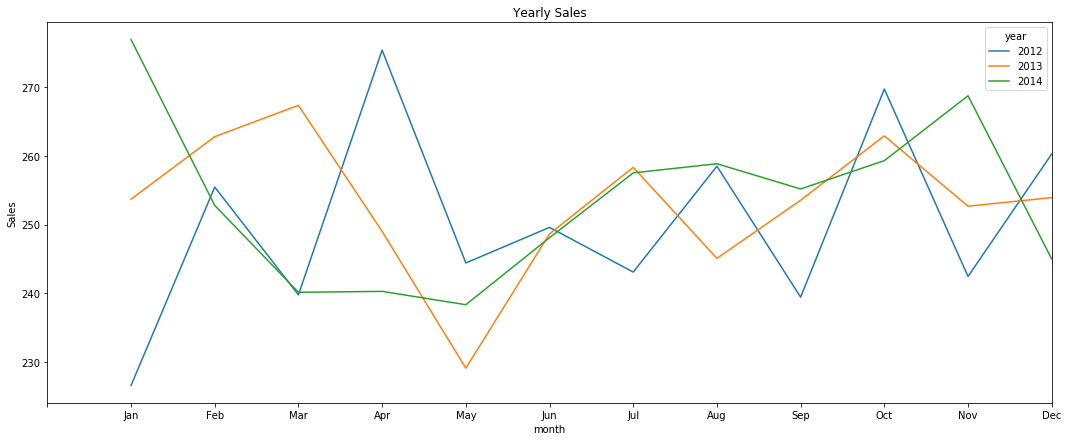

In [203]:
import calendar
# select all stores that were open
# subs = train[train['Open']!=0]
subs = df2[df2['year'] != 2011]

# groupby Year and Month
selected_sales = subs.groupby(['year', 'month'])['Sales'].median()

# groupby Year and Month
selected_sales = subs.groupby(['year', 'month'])['Sales'].median()
# selected_cust = subs.groupby(['Year', 'Month'])['Customers'].median()

# plot
fig, (axis1) = plt.subplots(1,1, figsize=(18,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Yearly Sales")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

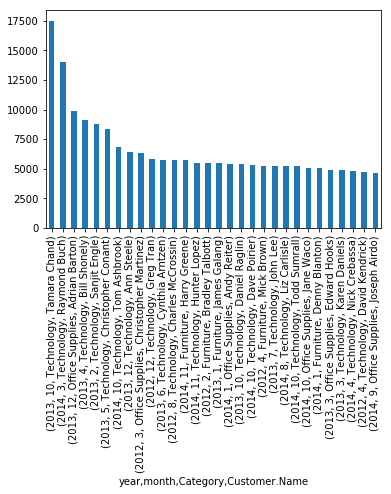

In [219]:
subs = df2[df2['year']!=2011]
selected_cust = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].median().nlargest(30).plot(kind='bar')
selected_cust


# df_cust = pd.pivot_table(df2,index=['year','month','Customer.Name'],values=['Sales'], aggfunc=[np.sum],dropna=False)
# df_cust = pd.pivot_table(df2,index=['year','month','Customer.Name'],aggfunc=len,dropna=False)

#df_cust.head(3)

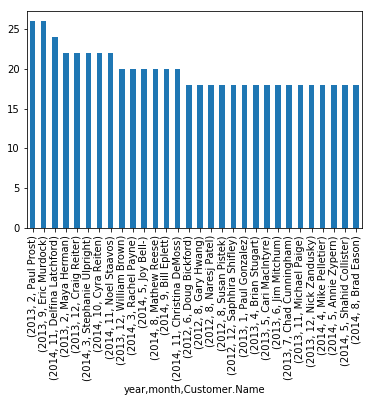

In [217]:
selected_cust1 = subs.groupby(['year', 'month','Customer.Name'])['Sales'].count().nlargest(30).plot(kind='bar')
selected_cust1

In [268]:
subs =df2[df2['year']==2014]
#subs
# groupby Year and Month
# selected_sales = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].median().nlargest(20)
#selected_sales = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].median()
# selected_cust = subs.groupby(['year', 'month','Category','Customer.Name'])['Sales'].value_counts().nlargest(20)
# selected_cust = subs.groupby(['month']).value_counts()
# print selected_cust
# selected_cust = subs.groupby(['year', 'month','Customer.Name'])['Sales'].count()

# selected_cust = df2.groupby(pd.Grouper(freq='D')).apply(lambda x : x.Customer.Name.value_counts()).stack()
selected_cust =df2.groupby(pd.Grouper(freq='D')).apply(lambda x : x.Customer.Name.value_counts()).stack()
print selected_cust
# plot
fig, (axis1) = plt.subplots(1,1, figsize=(28,10))
selected_cust.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Yearly Sales")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [187]:
''' 
    df
  location  name  Jan-2010  Feb-2010  March-2010
0        A  test        12        20          30
1        B   foo        18        20          25
>>> df2 = pd.melt(df, id_vars=["location", "name"], 
                  var_name="Date", value_name="Value")
>>> df2
'''
df11 = pd.DataFrame( { 
    "Name" : ["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"] , 
    "City" : ["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"] } )
#print df11
#print df11.shape
#print type(df11)
hg1 = df11.groupby([ "Name", "City"]).count()
print (hg1)
#type(g1)
print hg1.index
  

Empty DataFrame
Columns: []
Index: [(Alice, Seattle), (Bob, Seattle), (Mallory, Portland), (Mallory, Seattle)]
MultiIndex(levels=[[u'Alice', u'Bob', u'Mallory'], [u'Portland', u'Seattle']],
           labels=[[0, 1, 2, 2], [1, 1, 0, 1]],
           names=[u'Name', u'City'])


,Name,City
0,Alice,Seattle
1,Bob,Seattle
2,Mallory,Portland
3,Mallory,Seattle


In [28]:
 # dff1 = df2.ix[['Order_Date'] > '2014-01-01':'2014-01-10']
 # dff1.shape

dff2 = df2[(df2['Order_Date'] > '2014-01-01') &  (df2['Order_Date'] > '2014-10-14') ]    
print dff2.shape
dff2.head()
# If the dates are in the index then simply:
# df['20160101':'20160301']

(5020, 32)


,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Profit,Shipping_Cost,Order_Priority,Return,Returned,year,month,day,dofweek,days
16,17,36178,CA-2014-143567,2014-11-03,11/6/2014,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,...,517.4793,780.70,Critical,No,0,2014,11,3,0,Monday
19,20,49463,TZ-2014-8190,2014-12-05,12/7/2014,Second Class,RH-9555,Ritsa Hightower,Consumer,Uvinza,...,818.2800,763.38,High,No,0,2014,12,5,4,Friday
37,38,31980,US-2014-168116,2014-11-05,11/5/2014,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,...,-3839.9904,674.82,High,No,0,2014,11,5,2,Wednesday
41,42,29272,IN-2014-37320,2014-11-11,11/15/2014,Standard Class,BF-11005,Barry Franz,Home Office,Gorakhpur,...,632.5200,658.69,High,No,0,2014,11,11,1,Tuesday
49,50,6550,MX-2014-126984,2014-12-18,12/20/2014,Second Class,JH-15820,John Huston,Consumer,Paysand�,...,868.1200,634.53,High,No,0,2014,12,18,3,Thursday


In [6]:
# row slicing and column slicing
# select rows 0,1,2 and not 3 plus select columns 0,1,3 and not 4th column
df2.iloc[0:3,0:4]

,Unnamed: 0,Row.ID,Order_ID,Order_Date
0,1,32298,CA-2012-124891,7/31/2012
1,2,26341,IN-2013-77878,2/5/2013
2,3,25330,IN-2013-71249,10/17/2013


In [8]:
# integer based
df2.iloc[[0,3,4],:]
# label based one
df2.loc[[0,3,4],:]

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0


In [9]:
df2.loc[[0,3,4],:]

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0


In [48]:
df2.head()

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Shipping_Cost,Order_Priority,Return,Returned,year,month,day,dofweek,days,Sales2
0,1,32298,CA-2012-124891,2012-07-31,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,933.57,Critical,No,0,2012,7,31,1,Tuesday,0.023097
1,2,26341,IN-2013-77878,2013-02-05,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,923.63,Critical,Yes,1,2013,2,5,1,Tuesday,0.037094
2,3,25330,IN-2013-71249,2013-10-17,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,915.49,Medium,No,0,2013,10,17,3,Thursday,0.051752
3,4,13524,ES-2013-1579342,2013-01-28,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,910.16,Medium,No,0,2013,1,28,0,Monday,0.028925
4,5,47221,SG-2013-4320,2013-11-05,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,903.04,Critical,No,0,2013,11,5,1,Tuesday,0.028330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D857198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000207A5198>]], dtype=object)

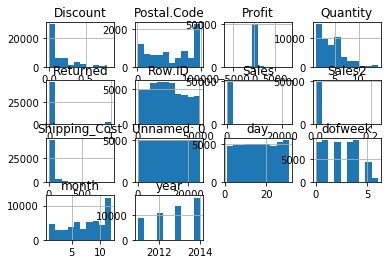

In [49]:
df2.hist()

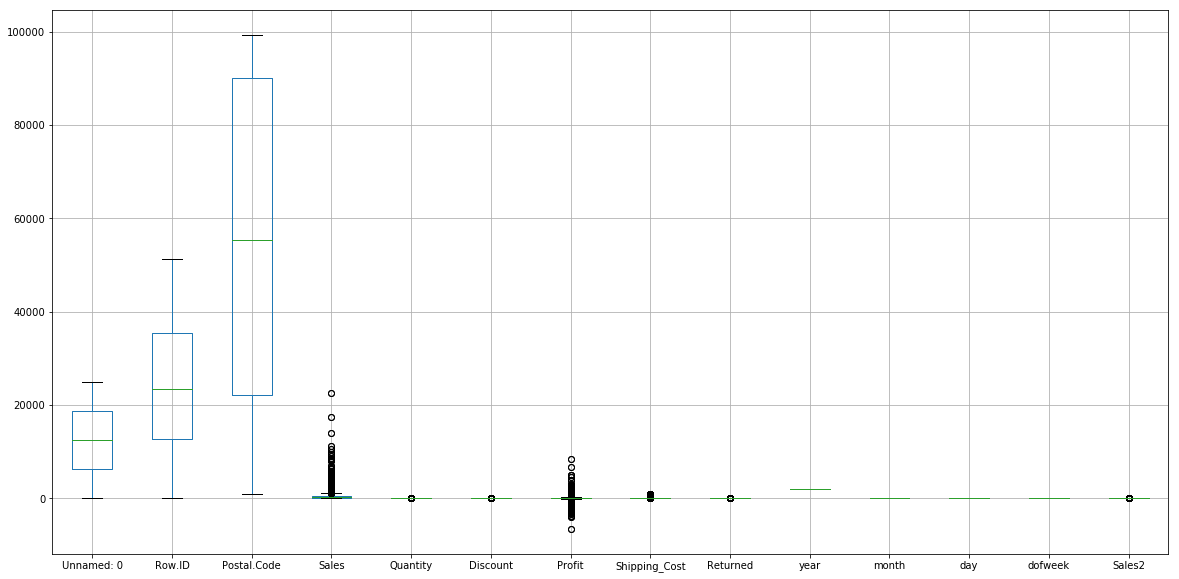

In [54]:
plt.figure(figsize=(20,10))
df2.boxplot()

In [75]:
#((df2.isnull().sum() / df2.isnull().sum().count())  * 100).apply(lambda x:(int(x)))

# df2.isnull().sum() 
# df2.isnull().sum().count()  * 100
# df2.shape
((df2.isnull().sum() / df2.isnull().sum().count())  * 100)

Unnamed: 0             0.000000
Row.ID                 0.000000
Order_ID               0.000000
Order_Date             0.000000
Ship_Date              0.000000
Ship_Mode              0.000000
Customer_ID            0.000000
Customer.Name          0.000000
Segment               24.242424
City                   0.000000
State                  0.000000
Country                0.000000
Postal.Code       127006.060606
Market                 0.000000
Region                 0.000000
Product.ID             0.000000
Category               0.000000
Sub.Category           0.000000
Product.Name           0.000000
Sales                339.393939
Quantity               0.000000
Discount               0.000000
Profit                 0.000000
Shipping_Cost          0.000000
Order_Priority         0.000000
Return                 0.000000
Returned               0.000000
year                   0.000000
month                  0.000000
day                    0.000000
dofweek                0.000000
days    

In [73]:
df2.size

1650000

In [76]:
df2.isnull().sum()

Unnamed: 0            0
Row.ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer.Name         0
Segment               8
City                  0
State                 0
Country               0
Postal.Code       41912
Market                0
Region                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales               112
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
Return                0
Returned              0
year                  0
month                 0
day                   0
dofweek               0
days                  0
Sales2              112
dtype: int64

In [285]:
df2['Sales'].quantile(0.75)
df2.Profit.describe()

count    50000.000000
mean        55.601201
std        244.642416
min      -6599.978000
25%          3.537000
50%         32.951700
75%         89.992500
max       8399.976000
Name: Profit, dtype: float64

In [284]:
df2.Sales.describe()
df2.Profit.describe()
df2.groupby('Product.Name')['Profit'].sum().sort_values(ascending=False)

Product.Name
Canon imageCLASS 2200 Advanced Copier                                          50399.85600
Cisco Smart Phone, Full Size                                                   34477.04120
Motorola Smart Phone, Full Size                                                34054.22600
Hoover Stove, Red                                                              23615.93800
Sauder Classic Bookcase, Traditional                                           21344.14600
Harbour Creations Executive Leather Armchair, Adjustable                       20854.65200
Cisco Smart Phone, with Caller ID                                              19800.18160
Nokia Smart Phone, with Caller ID                                              18930.65140
Belkin Router, USB                                                             17910.03600
Hewlett Wireless Fax, High-Speed                                               17355.87828
Canon Wireless Fax, Laser                                                    

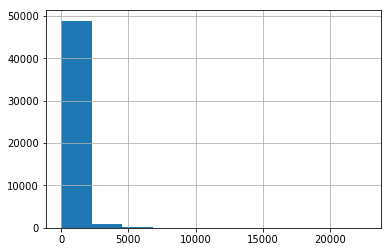

In [83]:
df2.Sales.hist()

In [117]:
#def treatOutlier(df,var):
 #   if(is.float(df[,var])):
   #     per.95 = quantile(df[,var],0.95)
# 0.1 is 10th percentile,   0.5 is median, 0.9 is 90th percentile
print df2['Sales'].quantile([0,0.1,0.2,0.9,0.95,0.99,1])
print df2['Sales'].max()

0.00       16.192
0.10       82.140
0.20      115.800
0.90     1019.520
0.95     1516.320
0.99     2897.910
1.00    22638.480
Name: Sales, dtype: float64
22638.48


In [252]:
df3=df2.copy()
x = df3['Sales'].quantile([0.9]).values
val = float(x)
df3['Sales'] = np.where(df3['Sales']> val, val,df3['Sales'])

In [272]:
df2.Sales.describe()

count    49888.000000
mean       452.892613
std        622.530300
min         16.192000
25%        134.606250
50%        252.716780
75%        525.855000
max      22638.480000
Name: Sales, dtype: float64

# Treating Outlier 

In [275]:
df3=df2.copy()
print df3['Sales'].quantile([0.01,0.1,0.9]).values
def treatOutlier(df,var):
    x = df[var].quantile([0.9]).values
    val = float(x)
    x1 = df[var].quantile([0.1]).values
    val2=float(x1)
    df[var] = np.where(df[var]> val, val,df[var])
    df[var] = np.where(df[var] < val2, val,df[var])
    return 
treatOutlier(df3,'Sales')

[   39.096    82.14   1019.52 ]


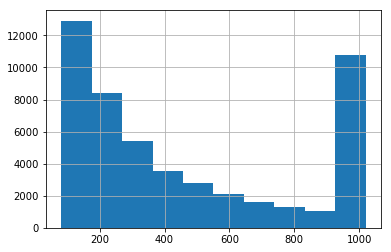

In [274]:
df3.Sales.hist()

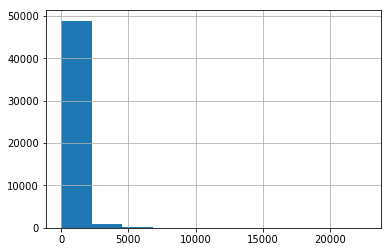

In [240]:
df2.Sales.hist()

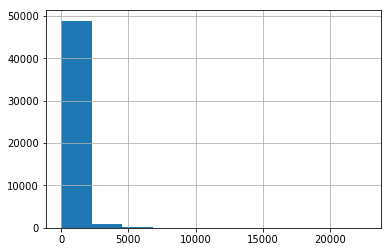

In [129]:
df2.Sales.hist()

In [121]:
y1 = np.linspace(0.1, 1.1, 6)
y1

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1])

In [115]:
y1 = np.linspace(0, 0.1, 10)
y1

array([ 0.        ,  0.01111111,  0.02222222,  0.03333333,  0.04444444,
        0.05555556,  0.06666667,  0.07777778,  0.08888889,  0.1       ])